# Overview of the Performance of all Models

This is the last of 4 notebooks of project 2. You have to run the other 3 notebooks first before you can run this one.
The goal of this notebook is to get an overview about the performance of all models.

In [1]:
# load models from above
from tensorflow.keras.models import load_model
import os
import json
import pandas as pd

with open("accuracy.json", "r") as f:
    loaded_data = json.load(f)

# Convert back to variables if needed
acc_classifier7 = loaded_data["acc_classifier7"]
acc_classifier8 = loaded_data["acc_classifier8"]
acc_classifier9 = loaded_data["acc_classifier9"]
acc_classifier10 = loaded_data["acc_classifier10"]

folder_path = "models_trained"
historyFile_classifier_1 = os.path.join(folder_path, 'models_BoW/logistic_regression_count_based_BOW_V_1000.json')
historyFile_classifier_2 = os.path.join(folder_path, 'models_BoW/logistic_regression_tfidf_based_BOW_V_1000.json')
historyFile_classifier_3 = os.path.join(folder_path, 'models_LSTM/1_layer_BiLSTM_embeds_from_scratch.json')
historyFile_classifier_4 = os.path.join(folder_path, 'models_LSTM/2_layer_BiLSTM_embeds_from_scratch.json')
historyFile_classifier_5 = os.path.join(folder_path, 'models_LSTM/1_layer_BiLSTM_embeds_pretrained_frozen.json')
historyFile_classifier_6 = os.path.join(folder_path, 'models_LSTM/1_layer_BiLSTM_embeds_pretrained_adaptive.json')

with open(historyFile_classifier_1, 'r') as json_file:
    res_dict_classifier_1 = json.load(json_file)

with open(historyFile_classifier_2, 'r') as json_file:
    res_dict_classifier_2 = json.load(json_file)

with open(historyFile_classifier_3, 'r') as json_file:
    res_dict_classifier_3 = json.load(json_file)

with open(historyFile_classifier_4, 'r') as json_file:
    res_dict_classifier_4 = json.load(json_file)

with open(historyFile_classifier_5, 'r') as json_file:
    res_dict_classifier_5 = json.load(json_file)

with open(historyFile_classifier_6, 'r') as json_file:
    res_dict_classifier_6 = json.load(json_file)


2025-03-06 22:48:14.535227: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-03-06 22:48:14.535284: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-03-06 22:48:14.536225: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-03-06 22:48:14.545004: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-03-06 22:48:15.398702: W tensorflow/compiler/tf2

In [2]:
columns = ['model_name', 'epochs', 'training_time', 'train_accuracy', 'val_accuracy']
df_performance = pd.DataFrame(columns=columns)

data = [res_dict_classifier_1, res_dict_classifier_2, res_dict_classifier_3, res_dict_classifier_4, res_dict_classifier_5, res_dict_classifier_6]
for i, row in enumerate(data):
    df_performance.loc[i] = row

df_performance['train_accuracy'] = df_performance['train_accuracy'].apply(lambda x: x[-1] if isinstance(x, list) else x)
df_performance['val_accuracy'] = df_performance['val_accuracy'].apply(lambda x: x[-1] if isinstance(x, list) else x)

#add zero-shot classifier
df_performance.loc[6, 'model_name'] = 'zero-shot classifier'
df_performance.loc[6, 'epochs'] = 0
df_performance.loc[6, 'training_time'] = 0.01
df_performance.loc[6, 'val_accuracy'] = acc_classifier7

#add zero-shot classifier with prompting
df_performance.loc[7, 'model_name'] = 'zero-shot with prompting'
df_performance.loc[7, 'epochs'] = 0
df_performance.loc[7, 'training_time'] = 0.01
df_performance.loc[7, 'val_accuracy'] = acc_classifier8

#add zero-shot classifier with ajdusted prompts and labels
df_performance.loc[8, 'model_name'] = 'zero-shot adjusted prompt and labels'
df_performance.loc[8, 'epochs'] = 0
df_performance.loc[8, 'training_time'] = 0.01
df_performance.loc[8, 'val_accuracy'] = acc_classifier9

#add fine-tuned model
df_performance.loc[9, 'model_name'] = 'fine-tuned model'
df_performance.loc[9, 'val_accuracy'] = acc_classifier10
df_performance.loc[9, 'training_time'] = 3600 # approximate training time

df_performance

,model_name,epochs,training_time,train_accuracy,val_accuracy
0,"Logistic regression, count-based BOW, |V| = 1000",20.0,35.463378,0.984420,0.866812
1,"Logistic regression, tfidf-based BOW, |V| = 1000",20.0,37.368623,0.995490,0.840611
2,"1-layer BiLSTM, embeddings from scratch",5.0,33.520050,0.939319,0.914847
3,"2-layer BiLSTM, embeddings from scratch",5.0,46.464980,0.951209,0.932314
4,1-layer BiLSTM classifier (frozen pre-trained ...,5.0,30.903010,0.917999,0.921397
5,"1-layer BiLSTM, adaptive pre-trained embeddings",5.0,26.183662,0.931119,0.923581
6,zero-shot classifier,0.0,0.010000,NaN,0.438865
7,zero-shot with prompting,0.0,0.010000,NaN,0.631004
8,zero-shot adjusted prompt and labels,0.0,0.010000,NaN,0.486900
9,fine-tuned model,NaN,3600.000000,NaN,0.925764


We see that the model "2_layer_BiLSTM_classifier_embeddings_from_scratch" has the highest validation accuracy. At the same time, it also has the longest training time out of these models.

We can have a look at the training time vs validation accuracy of all models we trained. If training time is important to us, we look for a model that balances accuracy and training time well - such as "1_layer_BiLSTM_classifier_embeddings_from_scratch".

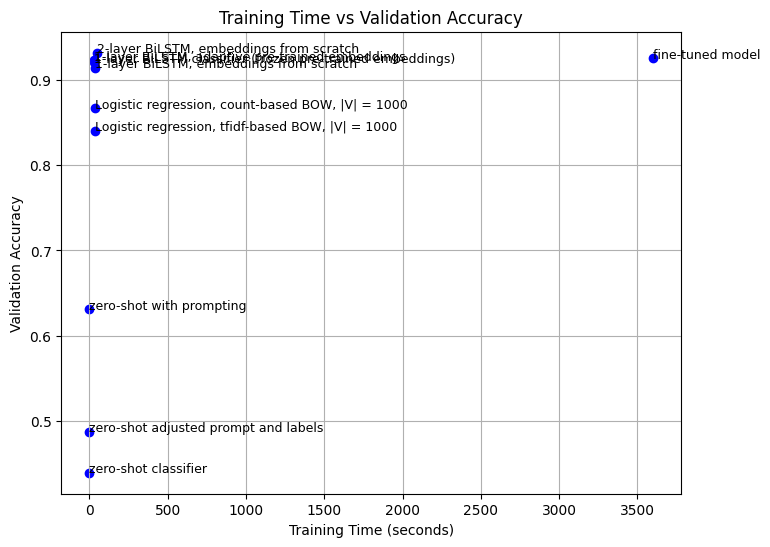

In [3]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter(df_performance["training_time"], df_performance["val_accuracy"], c='blue', marker='o')

plt.title('Training Time vs Validation Accuracy')
plt.xlabel('Training Time (seconds)')
plt.ylabel('Validation Accuracy')

for i, model_name in enumerate(df_performance["model_name"]):
    plt.annotate(model_name, (df_performance["training_time"].iloc[i], df_performance["val_accuracy"].iloc[i]),
                 fontsize=9)

# plt.xscale('log')
plt.grid(True)
plt.show()

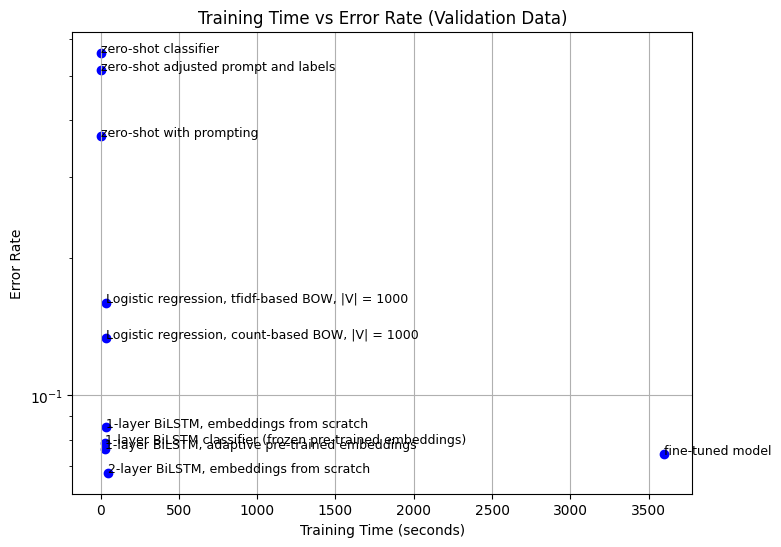

In [8]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter(df_performance["training_time"], 1-df_performance["val_accuracy"], c='blue', marker='o')

plt.title('Training Time vs Error Rate (Validation Data)')
plt.xlabel('Training Time (seconds)')
plt.ylabel('Error Rate')

for i, model_name in enumerate(df_performance["model_name"]):
    plt.annotate(model_name, (df_performance["training_time"].iloc[i], 1-df_performance["val_accuracy"].iloc[i]),
                 fontsize=9)

plt.yscale('log')
plt.grid(True)
plt.show()

**Exercise:** Interprete these results.